The merged data will now be cleaned further before Exploratoy Data Analysis and Cluster Analysis are performed.

#Data will be pre-processed prior to exploration

In [ ]:
import pandas as pd
data = pd.read_csv('euros_data.csv')
data.head(3)

,Team,FIFA Rank,Odds_to_One,Manager,Manager_Age,Contract until,Titles,Months_installed,Age,Height,Caps,Goals,MarketValue,Win Percentage,Q_GF,Q_GA,Q_GD,Q_PPG_Last_5,Q_Clean_Sheets,Q_xGF
0,Albania,66,500.0,Sylvinho,50,2024,0.0,17,27.308,183.615,26.115,1.538,4292308,38.709677,12.0,4.0,8.0,1.88,50%,1.13
1,Austria,25,66.0,Ralf Rangnick,65,2025,0.0,24,26.808,183.192,23.577,3.577,9057692,54.838710,17.0,7.0,10.0,2.38,38%,1.91
2,Belgium,3,16.0,Domenico Tedesco,38,2026,0.0,16,26.880,184.680,37.960,7.080,23380000,57.575758,22.0,4.0,18.0,2.50,63%,1.73


Change clean sheets to number to allow for regression analysis.

In [ ]:
# Step 1: Rename the column
data.rename(columns={'Q_Clean_Sheets': 'Q_Clean_Sheets%'}, inplace=True)

# Step 2: Convert percentage values to numeric values
data['Q_Clean_Sheets%'] = data['Q_Clean_Sheets%'].str.rstrip('%').astype(float)

# Display updated DataFrame
print("\nUpdated DataFrame:")
data.head(3)


Updated DataFrame:


,Team,FIFA Rank,Odds_to_One,Manager,Manager_Age,Contract until,Titles,Months_installed,Age,Height,Caps,Goals,MarketValue,Win Percentage,Q_GF,Q_GA,Q_GD,Q_PPG_Last_5,Q_Clean_Sheets%,Q_xGF
0,Albania,66,500.0,Sylvinho,50,2024,0.0,17,27.308,183.615,26.115,1.538,4292308,38.709677,12.0,4.0,8.0,1.88,50.0,1.13
1,Austria,25,66.0,Ralf Rangnick,65,2025,0.0,24,26.808,183.192,23.577,3.577,9057692,54.838710,17.0,7.0,10.0,2.38,38.0,1.91
2,Belgium,3,16.0,Domenico Tedesco,38,2026,0.0,16,26.880,184.680,37.960,7.080,23380000,57.575758,22.0,4.0,18.0,2.50,63.0,1.73


In [ ]:
#Check for null values
data.isnull().sum()

Team                0
FIFA Rank           0
Odds_to_One         0
Manager             0
Manager_Age         0
Contract until      0
Titles              0
Months_installed    0
Age                 0
Height              0
Caps                0
Goals               0
MarketValue         0
Win Percentage      0
Q_GF                1
Q_GA                1
Q_GD                1
Q_PPG_Last_5        1
Q_Clean_Sheets%     1
Q_xGF               1
dtype: int64

The only null values are the host team's non-existent qualifying record.

#Data exploration

Get numeric value ranges

In [ ]:
data.describe()

,FIFA Rank,Odds_to_One,Manager_Age,Contract until,Titles,Months_installed,Age,Height,Caps,Goals,MarketValue,Win Percentage,Q_GF,Q_GA,Q_GD,Q_PPG_Last_5,Q_Clean_Sheets%,Q_xGF
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,2.400000e+01,24.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,26.916667,122.729167,53.750000,2025.375000,0.625000,36.625000,27.038833,184.181500,30.355542,4.160417,1.848349e+07,54.082199,18.304348,7.304348,11.000000,2.129565,47.434783,1.739565
std,20.593196,159.358222,7.724889,0.824226,0.969648,33.734014,0.697863,1.224795,7.669113,1.901845,1.553050e+07,8.937073,5.708326,3.495904,7.850883,0.408450,16.070374,0.422691
min,2.000000,3.500000,36.000000,2024.000000,0.000000,5.000000,25.308000,181.769000,15.577000,1.538000,3.543269e+06,38.709677,12.000000,2.000000,-4.000000,1.200000,25.000000,1.000000
25%,8.750000,15.500000,49.750000,2025.000000,0.000000,15.000000,26.740500,183.509250,24.625250,2.490500,7.174519e+06,48.009073,15.000000,4.500000,7.000000,1.880000,38.000000,1.480000
50%,23.500000,66.000000,54.000000,2026.000000,0.000000,23.500000,27.077000,184.346000,30.105000,3.750000,1.222885e+07,52.332657,17.000000,7.000000,9.000000,2.200000,50.000000,1.730000
75%,39.250000,150.000000,60.000000,2026.000000,1.000000,49.500000,27.456250,184.842000,33.791500,5.249750,2.847596e+07,59.746110,21.000000,9.000000,11.000000,2.315000,55.000000,1.960000
max,75.000000,500.000000,65.000000,2026.000000,3.000000,143.000000,28.231000,186.769000,44.308000,8.654000,5.826923e+07,75.000000,36.000000,18.000000,34.000000,3.000000,90.000000,2.570000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Team              24 non-null     object 
 1   FIFA Rank         24 non-null     int64  
 2   Odds_to_One       24 non-null     float64
 3   Manager           24 non-null     object 
 4   Manager_Age       24 non-null     int64  
 5   Contract until    24 non-null     int64  
 6   Titles            24 non-null     float64
 7   Months_installed  24 non-null     int64  
 8   Age               24 non-null     float64
 9   Height            24 non-null     float64
 10  Caps              24 non-null     float64
 11  Goals             24 non-null     float64
 12  MarketValue       24 non-null     int64  
 13  Win Percentage    24 non-null     float64
 14  Q_GF              23 non-null     float64
 15  Q_GA              23 non-null     float64
 16  Q_GD              23 non-null     float64
 17 

All data is in numeric format except for nation and manager name.

In [ ]:
# Select numeric columns
import numpy as np
numeric_cols = data.select_dtypes(include=np.number).columns
numeric_cols

Index(['FIFA Rank', 'Odds_to_One', 'Manager_Age', 'Contract until', 'Titles',
       'Months_installed', 'Age', 'Height', 'Caps', 'Goals', 'MarketValue',
       'Win Percentage', 'Q_GF', 'Q_GA', 'Q_GD', 'Q_PPG_Last_5',
       'Q_Clean_Sheets%', 'Q_xGF'],
      dtype='object')

Correlation

Select only the numeric values to be included in correlation analysis.

In [ ]:
numeric_data = data.select_dtypes(include=np.number)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_data = scaler.fit_transform(numeric_data)
numeric_data = pd.DataFrame(numeric_data, columns=numeric_cols)
numeric_data.corr().style.background_gradient(cmap='tab20c')

,FIFA Rank,Odds_to_One,Manager_Age,Contract until,Titles,Months_installed,Age,Height,Caps,Goals,MarketValue,Win Percentage,Q_GF,Q_GA,Q_GD,Q_PPG_Last_5,Q_Clean_Sheets%,Q_xGF
FIFA Rank,1.000000,0.870838,-0.040040,-0.533442,-0.417513,-0.170094,0.117407,0.142642,-0.308296,-0.674198,-0.737596,-0.584327,-0.539984,0.499833,-0.615189,-0.561742,-0.404087,-0.733099
Odds_to_One,0.870838,1.000000,-0.087524,-0.577316,-0.295988,-0.139291,0.118802,0.080371,-0.162341,-0.536556,-0.573369,-0.550405,-0.413453,0.394624,-0.476341,-0.474631,-0.207438,-0.672486
Manager_Age,-0.040040,-0.087524,1.000000,0.117794,0.033376,0.197669,-0.177198,-0.145318,-0.391859,-0.295330,-0.055241,0.176157,-0.109424,-0.018220,-0.071448,0.048554,-0.144226,0.144496
Contract until,-0.533442,-0.577316,0.117794,1.000000,0.401212,-0.093237,0.073056,0.221654,0.241725,0.507307,0.260852,0.550511,0.196899,-0.178767,0.222767,0.277446,0.188823,0.401277
Titles,-0.417513,-0.295988,0.033376,0.401212,1.000000,-0.082909,0.011405,0.004338,-0.096647,0.194785,0.542373,0.282132,0.436334,-0.240610,0.424396,0.376979,0.300237,0.511758
Months_installed,-0.170094,-0.139291,0.197669,-0.093237,-0.082909,1.000000,0.186593,-0.131201,0.199238,0.193346,0.326199,0.253417,0.291508,-0.210834,0.305836,0.290739,0.213385,0.222491
Age,0.117407,0.118802,-0.177198,0.073056,0.011405,0.186593,1.000000,0.045472,0.507422,0.120173,-0.236711,0.013080,0.061541,0.219638,-0.053056,-0.145298,-0.093809,-0.081471
Height,0.142642,0.080371,-0.145318,0.221654,0.004338,-0.131201,0.045472,1.000000,0.232166,0.140581,-0.256606,-0.046929,-0.382673,0.377084,-0.446150,-0.454459,-0.342489,-0.101643
Caps,-0.308296,-0.162341,-0.391859,0.241725,-0.096647,0.199238,0.507422,0.232166,1.000000,0.709223,0.108971,0.386873,0.369639,-0.013692,0.274859,0.130180,0.201911,0.350390
Goals,-0.674198,-0.536556,-0.295330,0.507307,0.194785,0.193346,0.120173,0.140581,0.709223,1.000000,0.545781,0.702023,0.679335,-0.327321,0.639692,0.456876,0.530851,0.692546


In the above correlation plot a number of things stand out:


1.   Fifa Ranking,  is highly correlated with Tournament odds.
2.   Manager contract, Goals, Market Value, Win Percentage and Expected Goals in Qualifying are also correlated with Tournament Odds. This may mean they play a key role in prediction later.



Pairs Plot

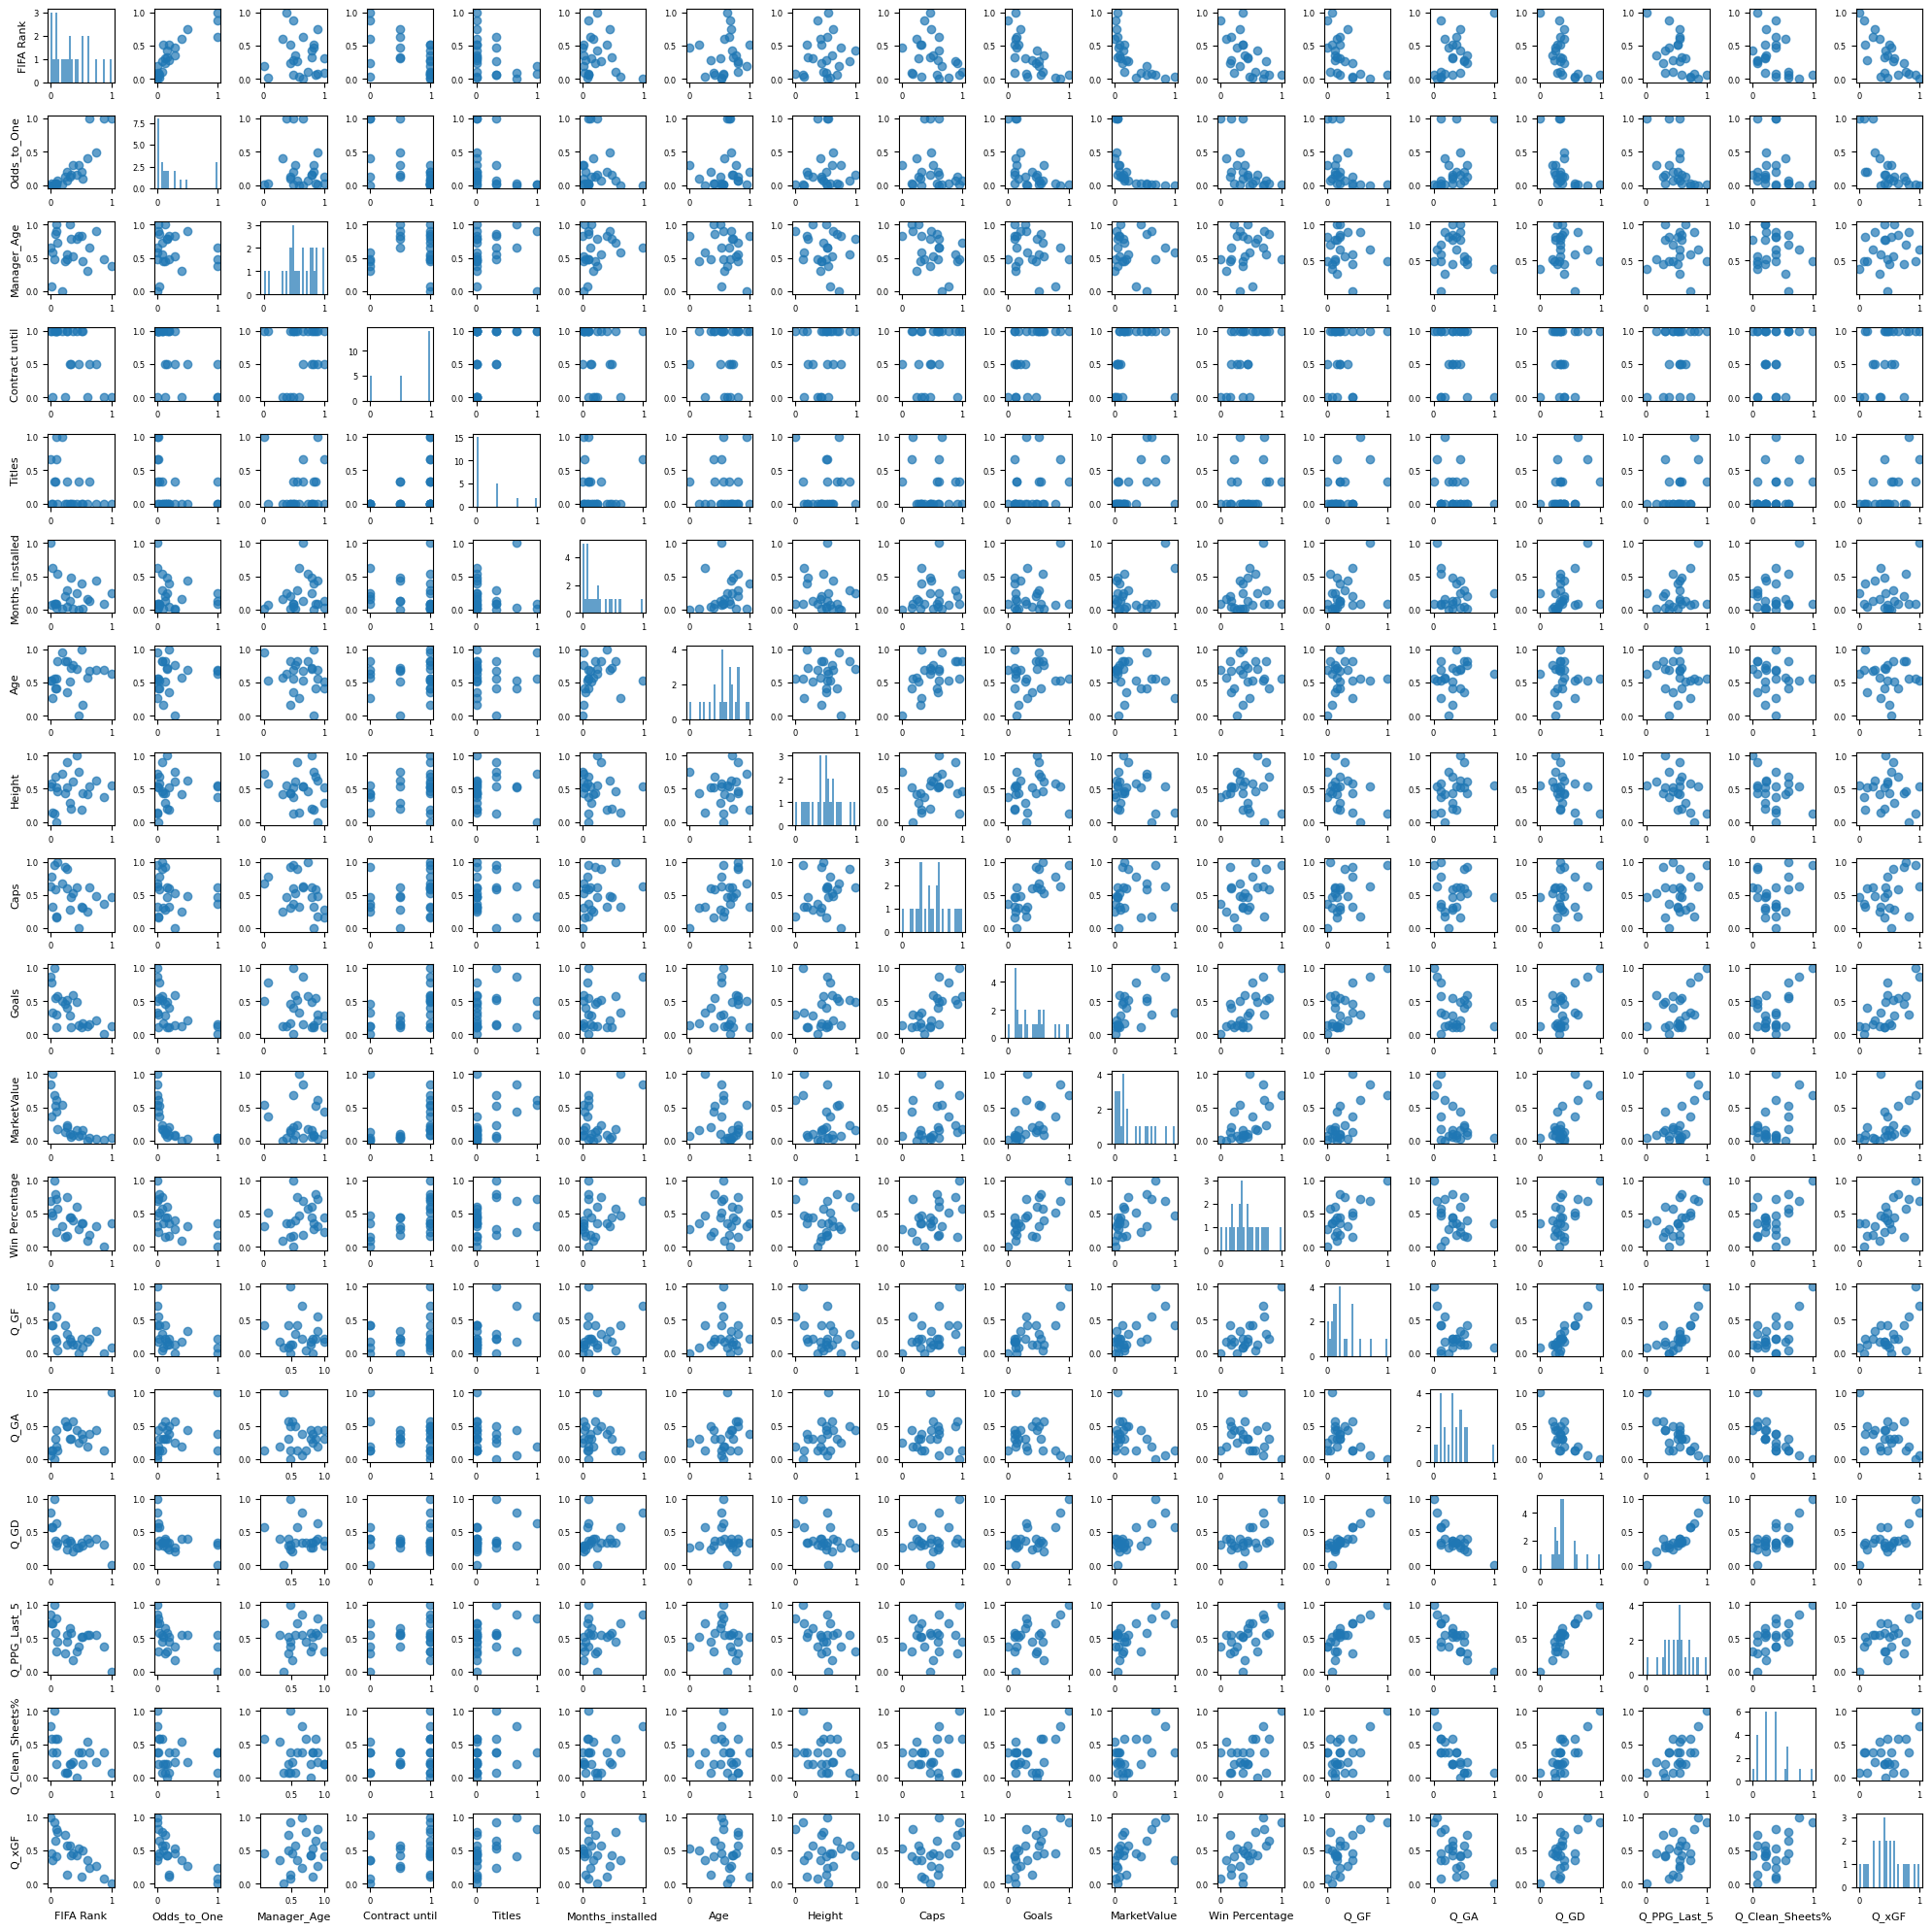

In [ ]:
import matplotlib.pyplot as plt

# Create scatter plot matrix
fig, axes = plt.subplots(len(numeric_data.columns), len(numeric_data.columns), figsize=(20, 20), sharex=False, sharey=False)

for i in range(len(numeric_data.columns)):
    for j in range(len(numeric_data.columns)):
        if i == j:  # If the axes are the same, plot a histogram instead of scatter plot
            axes[i, j].hist(numeric_data.iloc[:, i].dropna(), bins=30, alpha=0.7)
        else:
            axes[i, j].scatter(x=numeric_data.iloc[:, j], y=numeric_data.iloc[:, i], alpha=0.7)
        if j == 0:
            axes[i, j].set_ylabel(numeric_data.columns[i], fontsize=8)
        if i == len(numeric_data.columns) - 1:
            axes[i, j].set_xlabel(numeric_data.columns[j], fontsize=8)
        axes[i, j].tick_params(axis='both', which='major', labelsize=6)

fig.tight_layout()
plt.show()

The pairs plot above appears to show clear correlation between tournament odds and:


*   Fifa Rank
*   Market Value
*   Win Percentage
*   Q_GF and xQGF





Boxplots

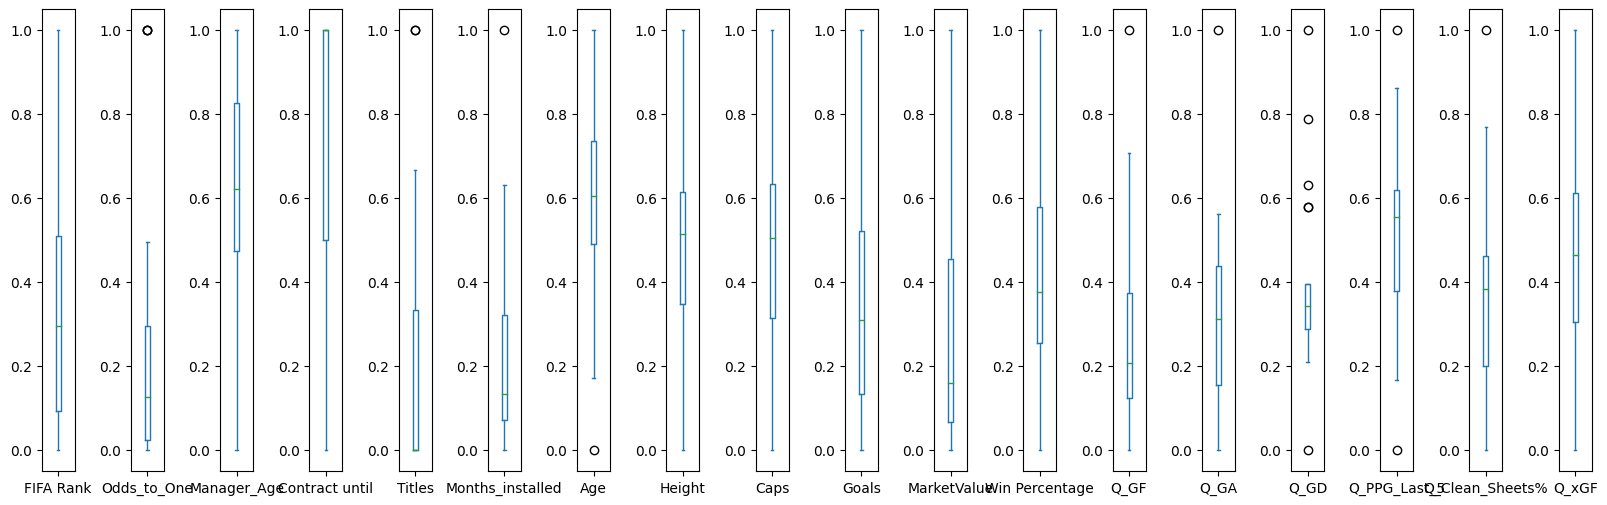

In [ ]:
numeric_data.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(20, 6)
)
# increase spacing between subplots
plt.subplots_adjust(wspace=1.7)
plt.show()

The most striking boxplots show positive outliers in torunament odds, titles, months installed, qualifying statistics.

Histograms

FIFA Rank


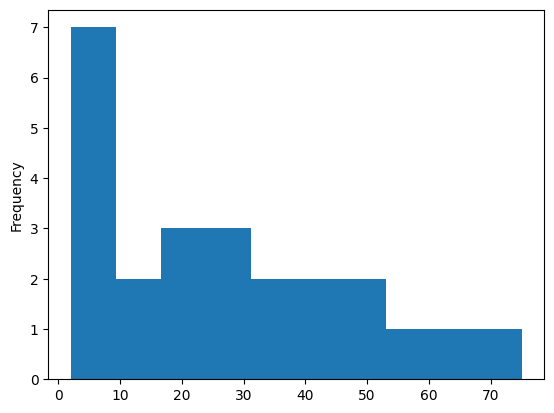

Odds_to_One


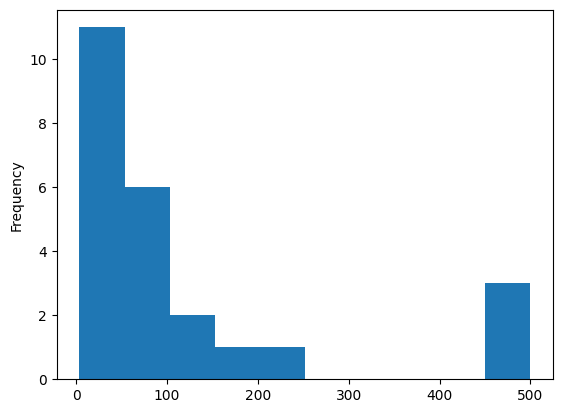

Manager_Age


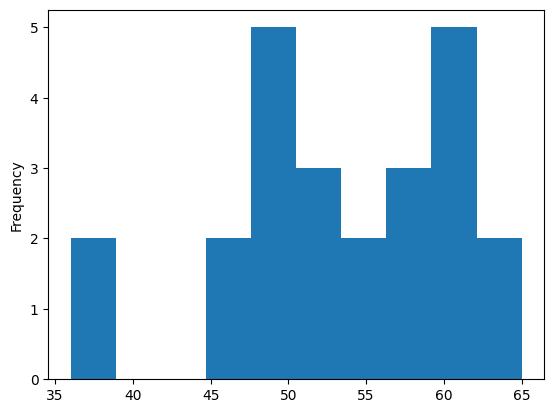

Contract until


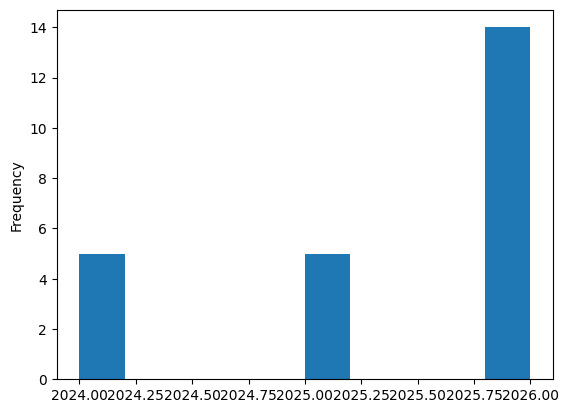

Titles


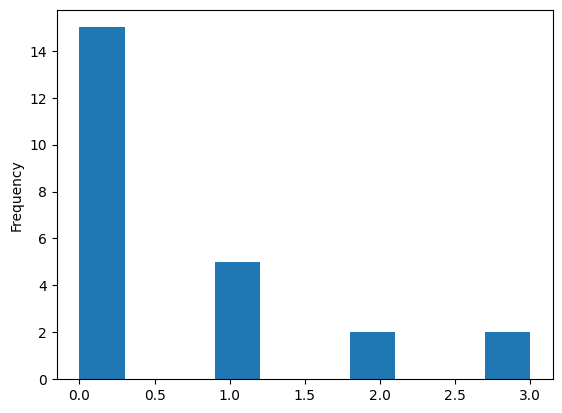

Months_installed


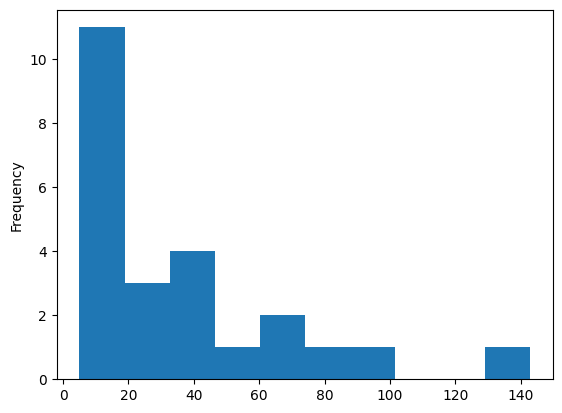

Age


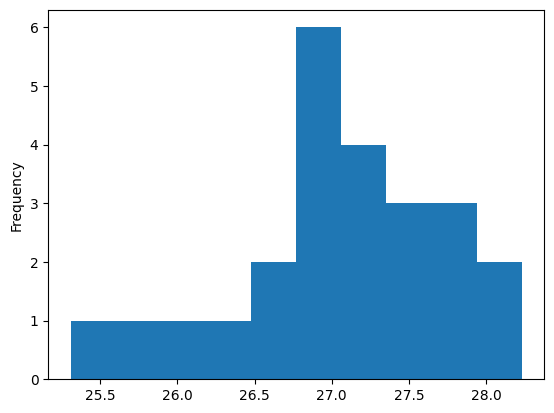

Height


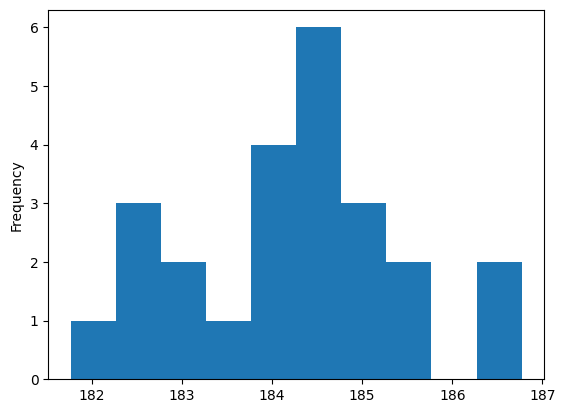

Caps


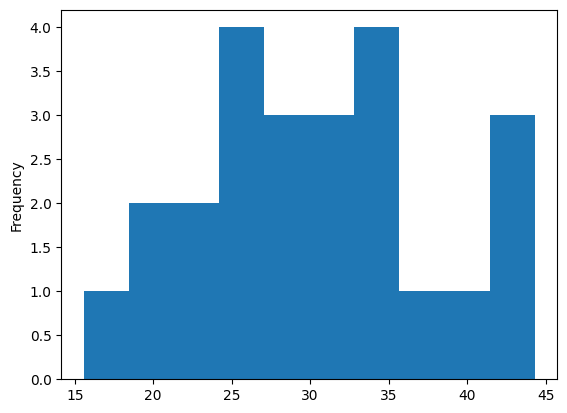

Goals


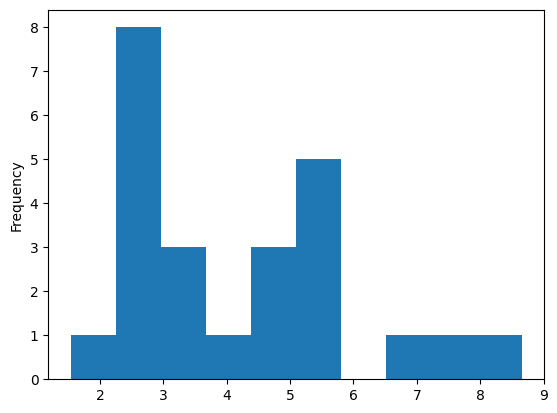

MarketValue


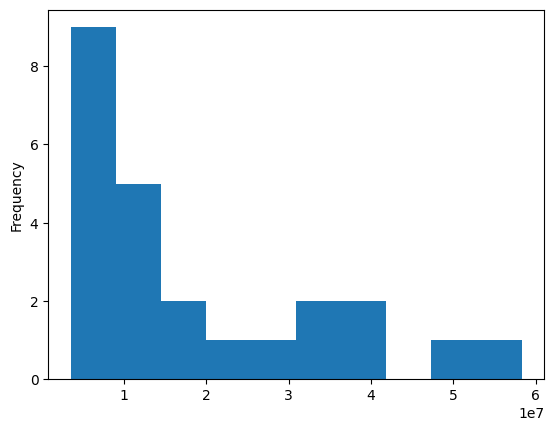

Win Percentage


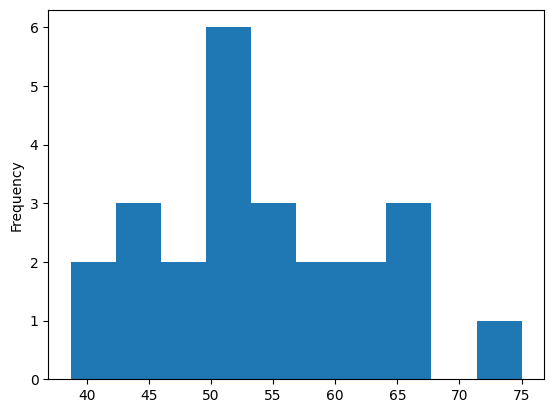

Q_GF


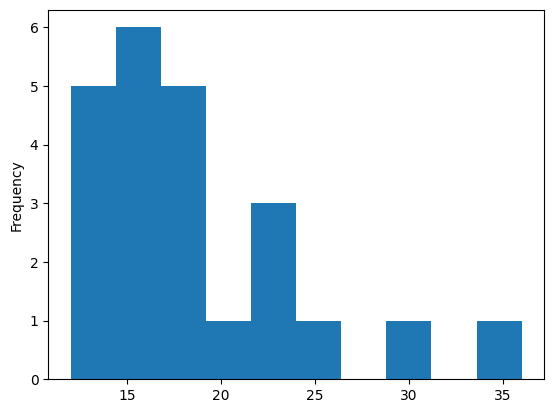

Q_GA


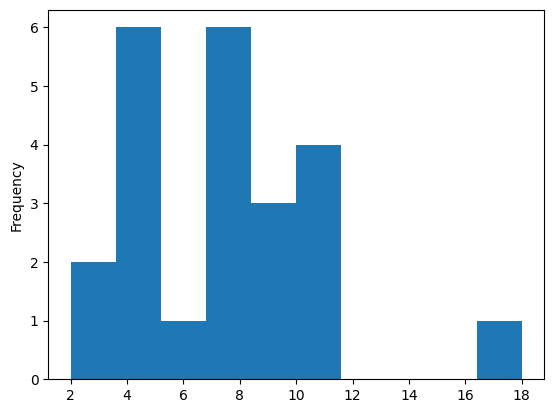

Q_GD


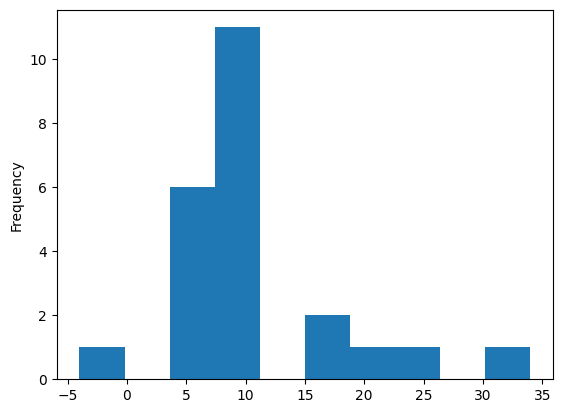

Q_PPG_Last_5


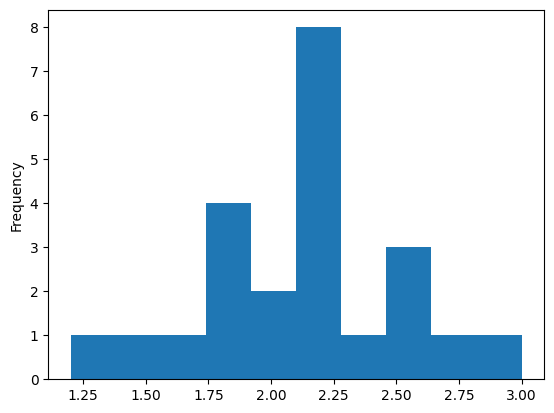

Q_Clean_Sheets%


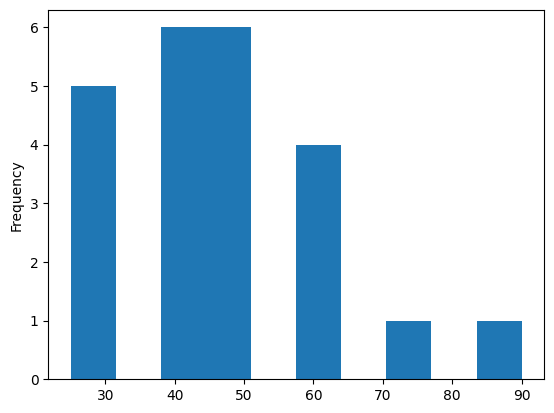

Q_xGF


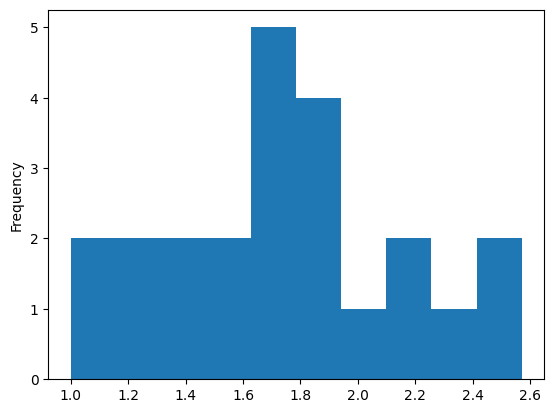

In [ ]:
for c in numeric_data.columns:
    print(c)
    data[c].plot.hist(bins=10)
    plt.show()

Data

In [ ]:
data.dtypes

Team                 object
FIFA Rank             int64
Odds_to_One         float64
Manager              object
Manager_Age           int64
Contract until        int64
Titles              float64
Months_installed      int64
Age                 float64
Height              float64
Caps                float64
Goals               float64
MarketValue           int64
Win Percentage      float64
Q_GF                float64
Q_GA                float64
Q_GD                float64
Q_PPG_Last_5        float64
Q_Clean_Sheets%     float64
Q_xGF               float64
dtype: object

#Clustering

In [ ]:
numeric_data

,FIFA Rank,Odds_to_One,Manager_Age,Contract until,Titles,Months_installed,Age,Height,Caps,Goals,MarketValue,Win Percentage,Q_GF,Q_GA,Q_GD,Q_PPG_Last_5,Q_Clean_Sheets%,Q_xGF
0,0.876712,1.000000,0.482759,0.0,0.000000,0.086957,0.684229,0.3692,0.366782,0.000000,0.013687,0.000000,0.000000,0.1250,0.315789,0.377778,0.384615,0.082803
1,0.315068,0.125881,1.000000,0.5,0.000000,0.137681,0.513171,0.2846,0.278445,0.286537,0.100764,0.444444,0.208333,0.3125,0.368421,0.655556,0.200000,0.579618
2,0.013699,0.025176,0.068966,1.0,0.000000,0.079710,0.537804,0.5822,0.779054,0.778808,0.362474,0.519865,0.416667,0.1250,0.578947,0.722222,0.584615,0.464968
3,0.109589,0.073515,0.724138,1.0,0.000000,0.543478,0.815600,0.4692,1.000000,0.578415,0.165563,0.571772,0.041667,0.1250,0.342105,0.444444,0.584615,0.783439
4,0.465753,0.295065,0.827586,0.5,0.333333,0.000000,0.000000,0.7538,0.000000,0.135188,0.071528,0.266667,0.000000,0.2500,0.263158,0.377778,0.384615,0.528662
5,0.260274,0.073515,0.551724,1.0,0.333333,0.297101,0.815600,0.9000,0.891546,0.513491,0.227269,0.741667,0.291667,0.5000,0.342105,0.555556,0.076923,0.573248
6,0.027397,0.000000,0.586207,0.0,0.000000,0.630435,0.263086,0.1386,0.329296,0.324340,1.000000,0.473203,0.416667,0.1250,0.578947,0.722222,0.384615,0.356688
7,0.000000,0.001007,0.655172,1.0,0.666667,1.000000,0.537804,0.5342,0.621733,0.863125,0.837203,0.693827,0.708333,0.0625,0.789474,0.861111,0.769231,1.000000
8,1.000000,1.000000,0.379310,0.0,0.000000,0.246377,0.631543,0.5462,0.461836,0.129848,0.047808,0.358621,0.083333,1.0000,0.000000,0.000000,0.076923,0.000000
9,0.191781,0.004028,0.000000,1.0,1.000000,0.021739,0.960315,0.7232,0.670669,0.508151,0.533339,0.311111,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Drop germany from clustering data as they have no qualifying data, delete a single row by index value 0
data_clustering = numeric_data.drop(labels=9, axis=0)
data_clustering

,FIFA Rank,Odds_to_One,Manager_Age,Contract until,Titles,Months_installed,Age,Height,Caps,Goals,MarketValue,Win Percentage,Q_GF,Q_GA,Q_GD,Q_PPG_Last_5,Q_Clean_Sheets%,Q_xGF
0,0.876712,1.000000,0.482759,0.0,0.000000,0.086957,0.684229,0.3692,0.366782,0.000000,0.013687,0.000000,0.000000,0.1250,0.315789,0.377778,0.384615,0.082803
1,0.315068,0.125881,1.000000,0.5,0.000000,0.137681,0.513171,0.2846,0.278445,0.286537,0.100764,0.444444,0.208333,0.3125,0.368421,0.655556,0.200000,0.579618
2,0.013699,0.025176,0.068966,1.0,0.000000,0.079710,0.537804,0.5822,0.779054,0.778808,0.362474,0.519865,0.416667,0.1250,0.578947,0.722222,0.584615,0.464968
3,0.109589,0.073515,0.724138,1.0,0.000000,0.543478,0.815600,0.4692,1.000000,0.578415,0.165563,0.571772,0.041667,0.1250,0.342105,0.444444,0.584615,0.783439
4,0.465753,0.295065,0.827586,0.5,0.333333,0.000000,0.000000,0.7538,0.000000,0.135188,0.071528,0.266667,0.000000,0.2500,0.263158,0.377778,0.384615,0.528662
5,0.260274,0.073515,0.551724,1.0,0.333333,0.297101,0.815600,0.9000,0.891546,0.513491,0.227269,0.741667,0.291667,0.5000,0.342105,0.555556,0.076923,0.573248
6,0.027397,0.000000,0.586207,0.0,0.000000,0.630435,0.263086,0.1386,0.329296,0.324340,1.000000,0.473203,0.416667,0.1250,0.578947,0.722222,0.384615,0.356688
7,0.000000,0.001007,0.655172,1.0,0.666667,1.000000,0.537804,0.5342,0.621733,0.863125,0.837203,0.693827,0.708333,0.0625,0.789474,0.861111,0.769231,1.000000
8,1.000000,1.000000,0.379310,0.0,0.000000,0.246377,0.631543,0.5462,0.461836,0.129848,0.047808,0.358621,0.083333,1.0000,0.000000,0.000000,0.076923,0.000000
10,0.328767,0.154079,0.793103,0.5,0.000000,0.478261,0.723572,0.2078,0.461836,0.108207,0.050830,0.444444,0.166667,0.3125,0.342105,0.583333,0.200000,0.426752


##Kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

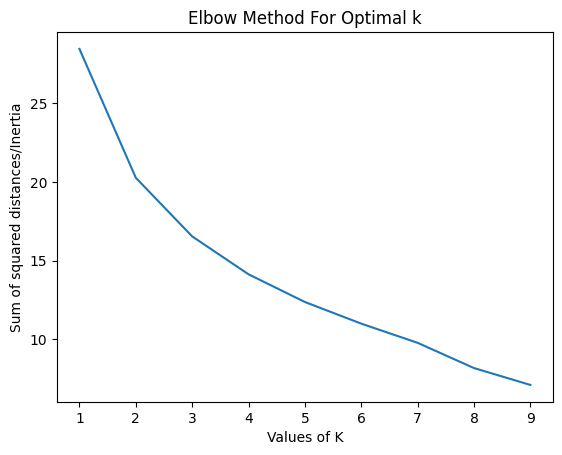

In [ ]:
#kmeans
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(data_clustering)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances)
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

K=3 seems to have a slight elbow in the graph above, so it is chosen for the cluster cut off.

In [ ]:
model = KMeans(n_clusters=3)
model.fit(data_clustering)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
labels = model.predict(data_clustering)
print(labels)

[2 1 0 0 1 1 0 0 2 1 1 0 1 0 2 1 1 2 2 0 1 1 1]


In [ ]:
data_clustering['K_meansCluster'] = labels
data_clustering

,FIFA Rank,Odds_to_One,Manager_Age,Contract until,Titles,Months_installed,Age,Height,Caps,Goals,MarketValue,Win Percentage,Q_GF,Q_GA,Q_GD,Q_PPG_Last_5,Q_Clean_Sheets%,Q_xGF,K_meansCluster
0,0.876712,1.000000,0.482759,0.0,0.000000,0.086957,0.684229,0.3692,0.366782,0.000000,0.013687,0.000000,0.000000,0.1250,0.315789,0.377778,0.384615,0.082803,2
1,0.315068,0.125881,1.000000,0.5,0.000000,0.137681,0.513171,0.2846,0.278445,0.286537,0.100764,0.444444,0.208333,0.3125,0.368421,0.655556,0.200000,0.579618,1
2,0.013699,0.025176,0.068966,1.0,0.000000,0.079710,0.537804,0.5822,0.779054,0.778808,0.362474,0.519865,0.416667,0.1250,0.578947,0.722222,0.584615,0.464968,0
3,0.109589,0.073515,0.724138,1.0,0.000000,0.543478,0.815600,0.4692,1.000000,0.578415,0.165563,0.571772,0.041667,0.1250,0.342105,0.444444,0.584615,0.783439,0
4,0.465753,0.295065,0.827586,0.5,0.333333,0.000000,0.000000,0.7538,0.000000,0.135188,0.071528,0.266667,0.000000,0.2500,0.263158,0.377778,0.384615,0.528662,1
5,0.260274,0.073515,0.551724,1.0,0.333333,0.297101,0.815600,0.9000,0.891546,0.513491,0.227269,0.741667,0.291667,0.5000,0.342105,0.555556,0.076923,0.573248,1
6,0.027397,0.000000,0.586207,0.0,0.000000,0.630435,0.263086,0.1386,0.329296,0.324340,1.000000,0.473203,0.416667,0.1250,0.578947,0.722222,0.384615,0.356688,0
7,0.000000,0.001007,0.655172,1.0,0.666667,1.000000,0.537804,0.5342,0.621733,0.863125,0.837203,0.693827,0.708333,0.0625,0.789474,0.861111,0.769231,1.000000,0
8,1.000000,1.000000,0.379310,0.0,0.000000,0.246377,0.631543,0.5462,0.461836,0.129848,0.047808,0.358621,0.083333,1.0000,0.000000,0.000000,0.076923,0.000000,2
10,0.328767,0.154079,0.793103,0.5,0.000000,0.478261,0.723572,0.2078,0.461836,0.108207,0.050830,0.444444,0.166667,0.3125,0.342105,0.583333,0.200000,0.426752,1


In [ ]:
data_clustering.groupby(by=["K_meansCluster"]).mean()

,FIFA Rank,Odds_to_One,Manager_Age,Contract until,Titles,Months_installed,Age,Height,Caps,Goals,MarketValue,Win Percentage,Q_GF,Q_GA,Q_GD,Q_PPG_Last_5,Q_Clean_Sheets%,Q_xGF
K_meansCluster,,,,,,,,,,,,,,,,,,
0,0.050881,0.019997,0.610837,0.857143,0.333333,0.359213,0.529544,0.361714,0.633079,0.626857,0.597790,0.681770,0.476190,0.133929,0.612782,0.732540,0.613187,0.714286
1,0.343711,0.157008,0.699060,0.772727,0.121212,0.171937,0.571051,0.530218,0.460437,0.303886,0.153997,0.376951,0.174242,0.414773,0.303828,0.427778,0.184615,0.445860
2,0.772603,0.778449,0.544828,0.200000,0.066667,0.214493,0.652549,0.498480,0.435599,0.121135,0.028035,0.187280,0.158333,0.425000,0.289474,0.408889,0.323077,0.185987


Clusters seem to separate clusters mainly on Fifa rank, tournament odds, titles, goals, market value, win percentage, some qualifying data.

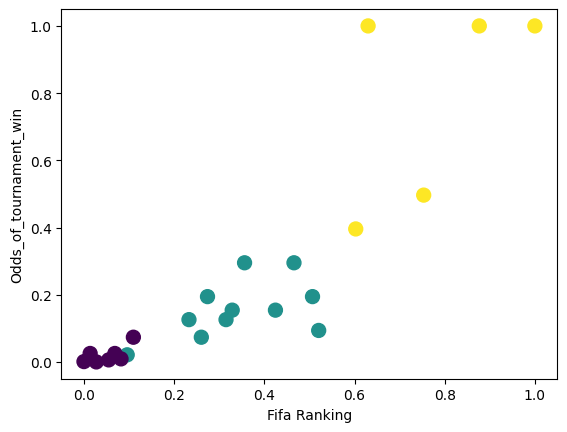

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# use colormap
colormap = data_clustering['K_meansCluster']
# depict illustration
plt.scatter(data_clustering['FIFA Rank'], data_clustering['Odds_to_One'], s=100, c=colormap)
plt.xlabel('Fifa Ranking')
plt.ylabel('Odds_of_tournament_win')
plt.show()

Clustering picks up on clear patterns between Fifa Ranking and Tournament Odds.

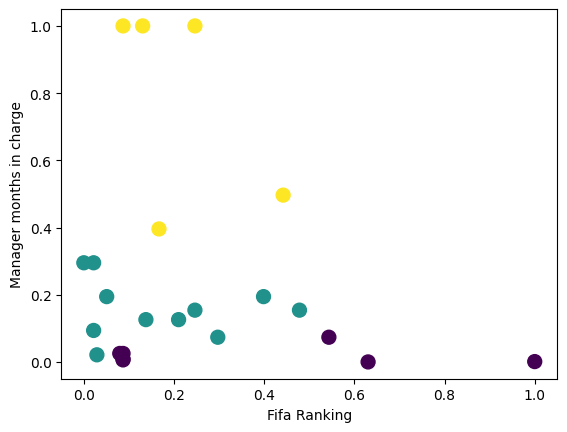

In [ ]:
# use colormap
colormap = data_clustering['K_meansCluster']
# depict illustration
plt.scatter(data_clustering['Months_installed'], data_clustering['Odds_to_One'], s=100, c=colormap)
plt.xlabel('Fifa Ranking')
plt.ylabel('Manager months in charge')
plt.show()

Clustering picks up on clear patterns between Fifa Ranking and Manager months in charge.

## Hierarchical

Drop german data and convert to array.

In [ ]:
numeric_data2 = numeric_data.drop(labels=9, axis=0)
X = numeric_data2.values
X

array([[0.87671233, 1.        , 0.48275862, 0.        , 0.        ,
        0.08695652, 0.68422853, 0.3692    , 0.36678153, 0.        ,
        0.01368709, 0.        , 0.        , 0.125     , 0.31578947,
        0.37777778, 0.38461538, 0.08280255],
       [0.31506849, 0.12588117, 1.        , 0.5       , 0.        ,
        0.13768116, 0.5131714 , 0.2846    , 0.27844489, 0.28653738,
        0.1007643 , 0.44444444, 0.20833333, 0.3125    , 0.36842105,
        0.65555556, 0.2       , 0.57961783],
       [0.01369863, 0.02517623, 0.06896552, 1.        , 0.        ,
        0.07971014, 0.53780363, 0.5822    , 0.77905398, 0.77880832,
        0.36247387, 0.51986532, 0.41666667, 0.125     , 0.57894737,
        0.72222222, 0.58461538, 0.46496815],
       [0.10958904, 0.0735146 , 0.72413793, 1.        , 0.        ,
        0.54347826, 0.81560041, 0.4692    , 1.        , 0.57841484,
        0.16556268, 0.57177177, 0.04166667, 0.125     , 0.34210526,
        0.44444444, 0.58461538, 0.78343949],
    

Try to cluster the data using Single, Average and Complete linkage.

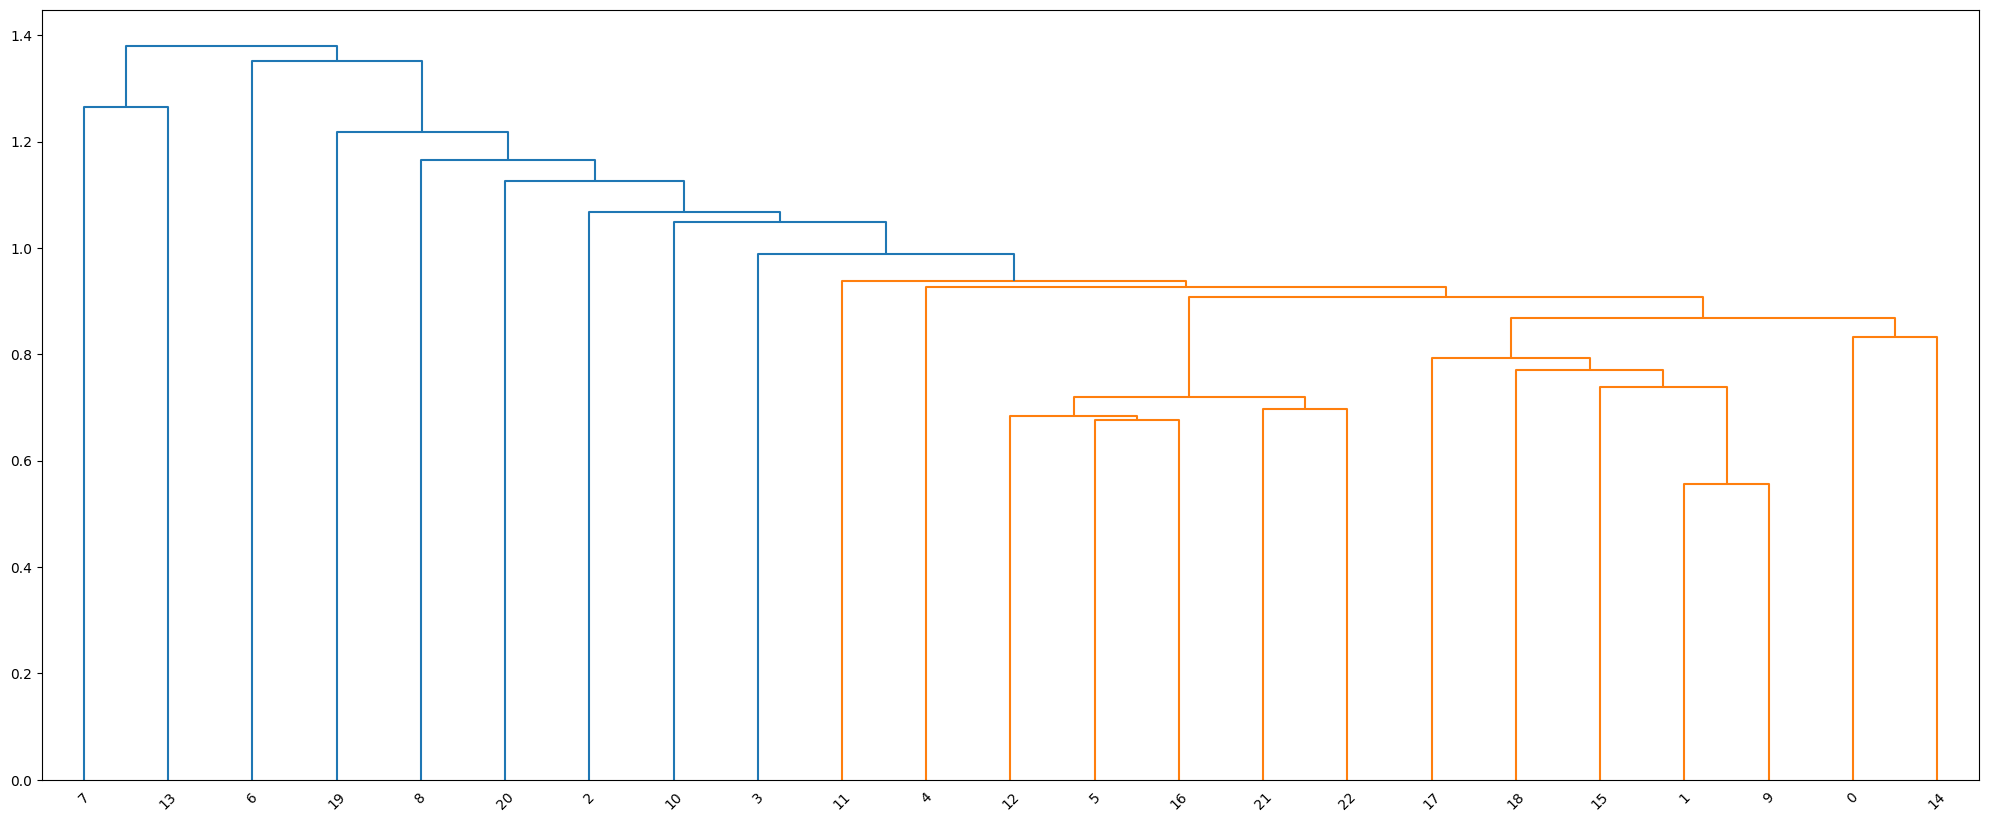

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z1 = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z1)
plt.show()

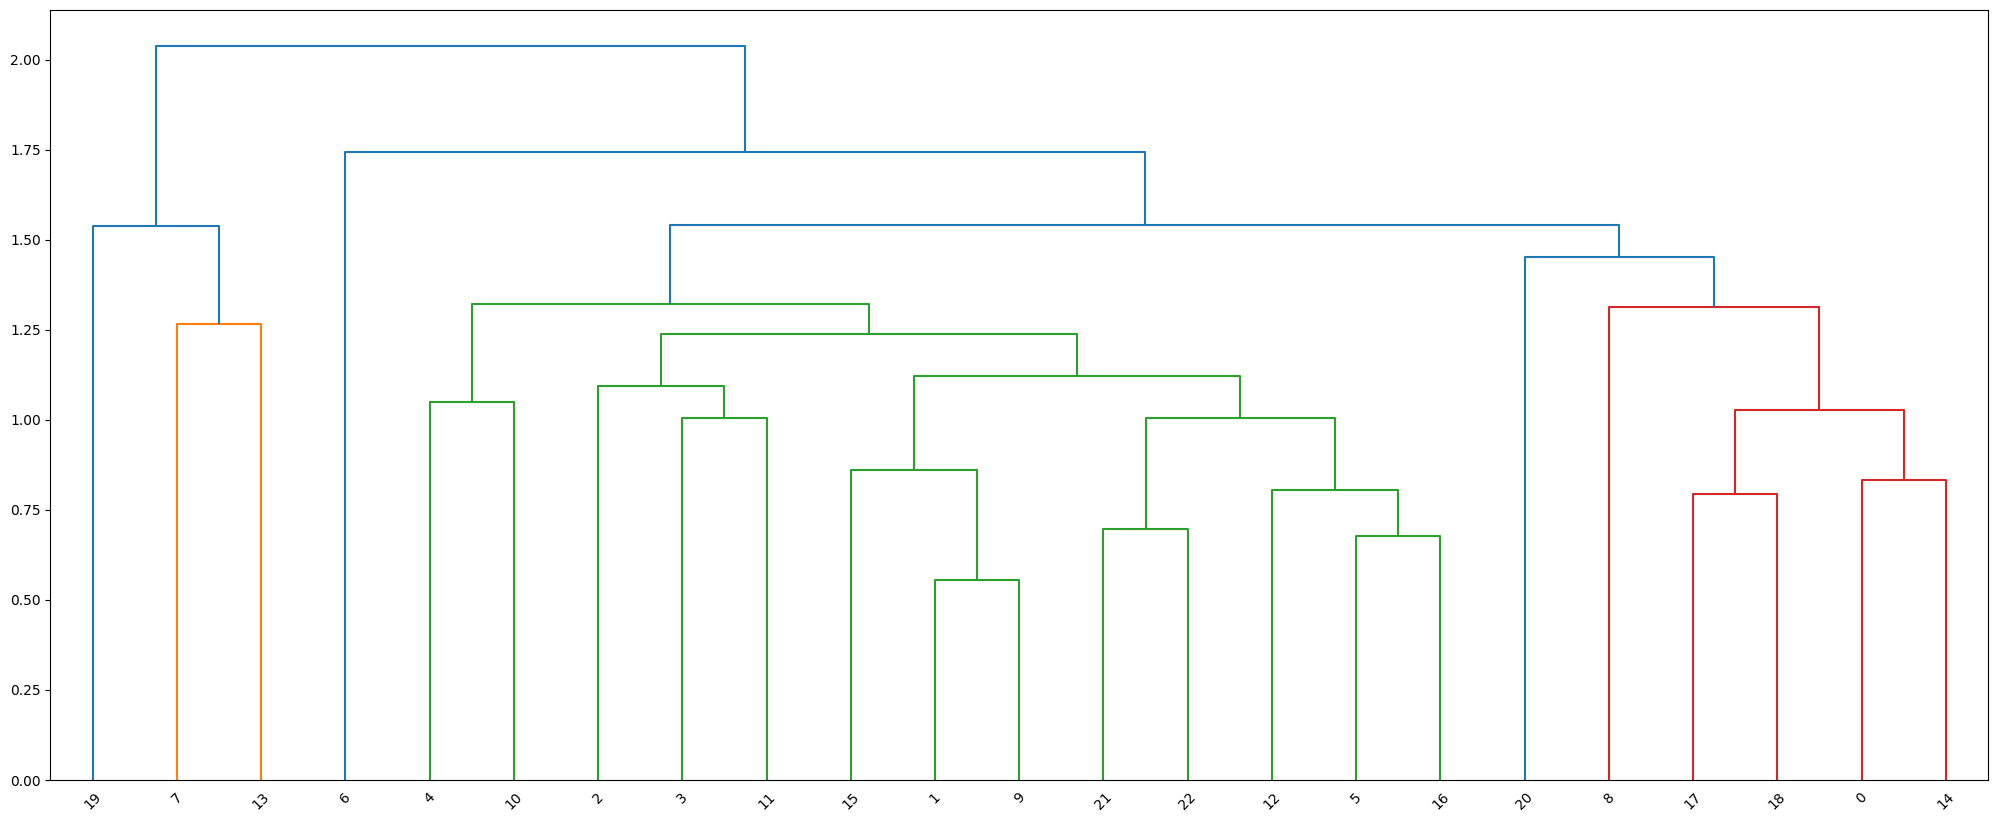

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z2 = linkage(X, 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z2)
plt.show()

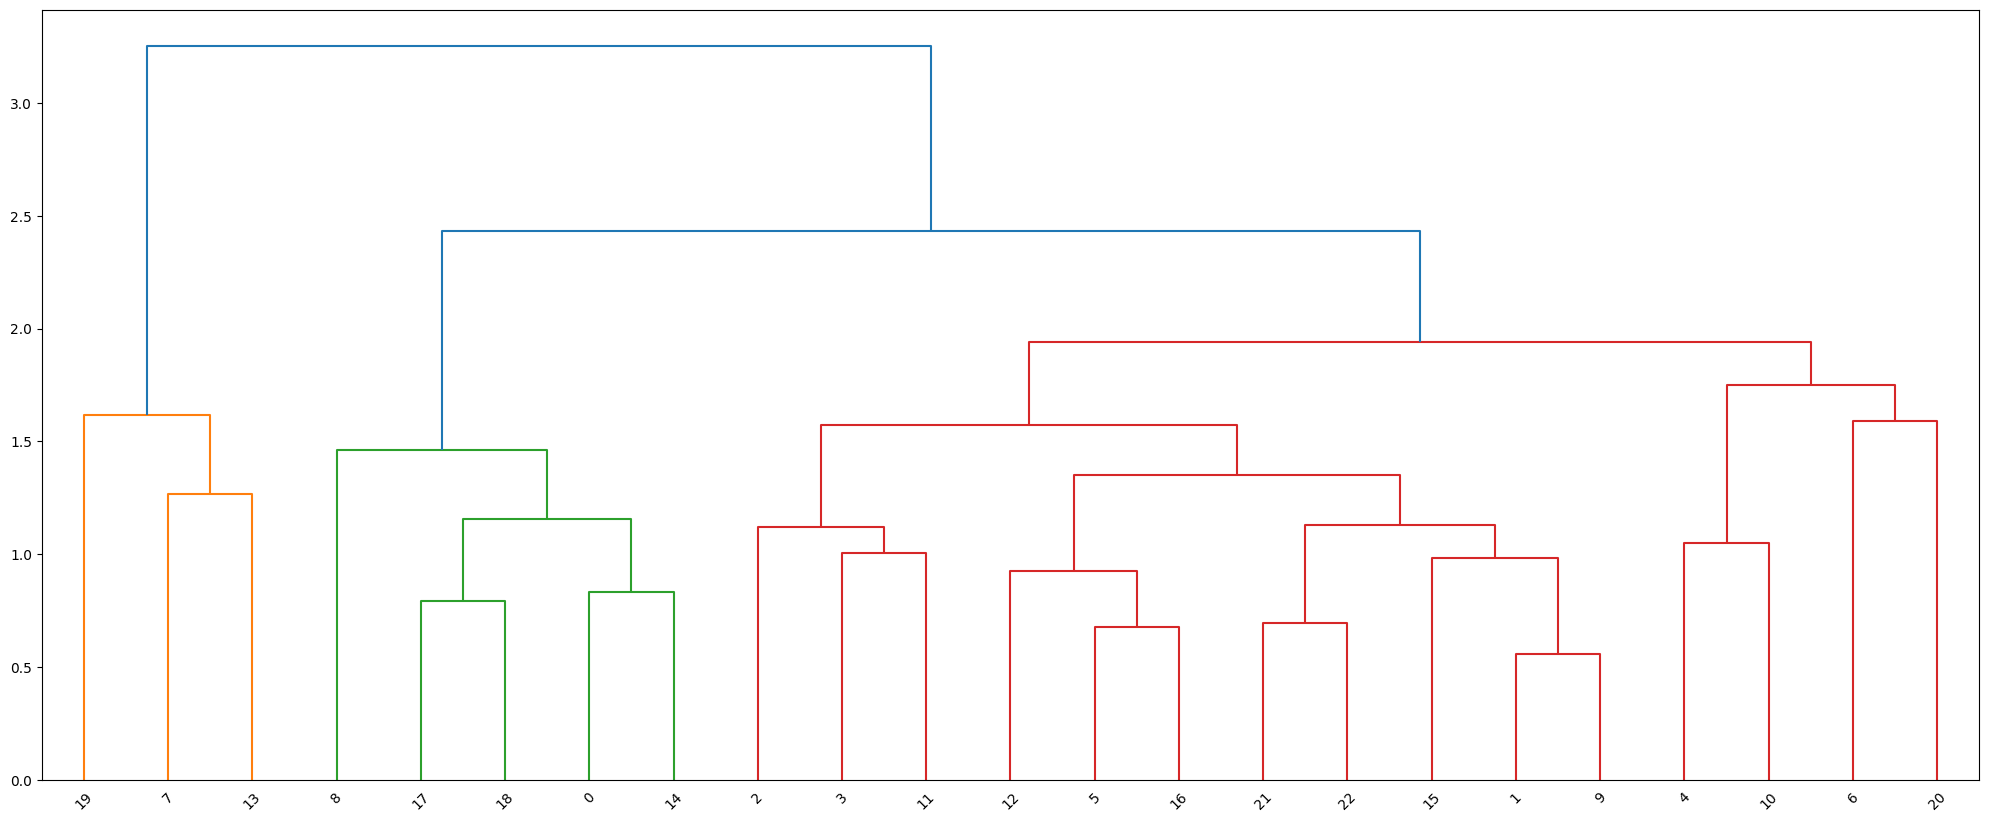

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z3 = linkage(X, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z3)
plt.show()

Plot elbow plots to choose appropriate number of clusters for each of the above methods. The appropriate number comes when a steeper decline begins to level off

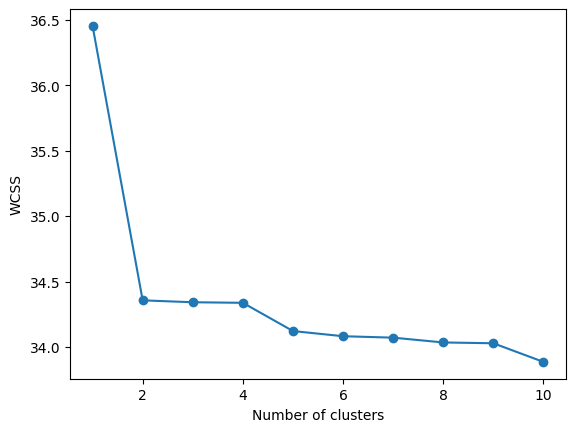

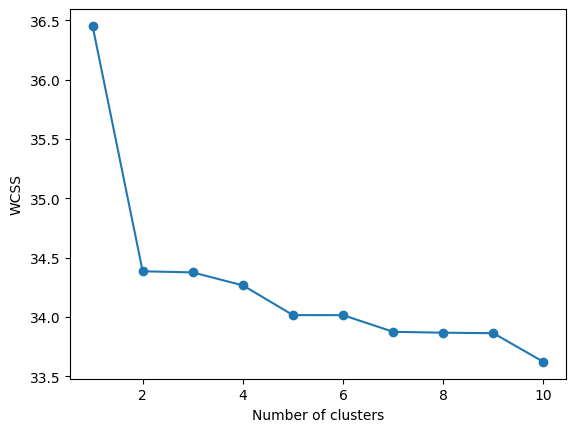

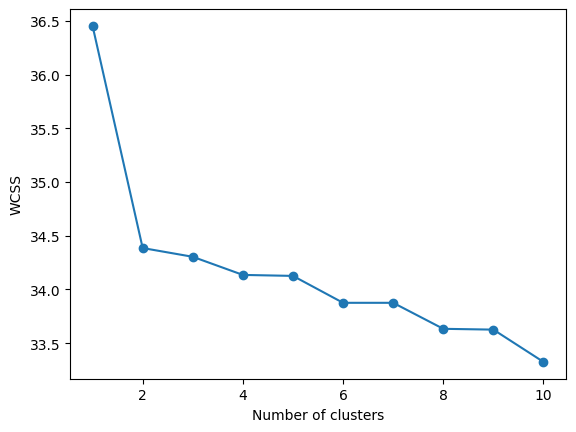

In [ ]:
from scipy.cluster.hierarchy import fcluster
#Elbow method (WCSS) for 3 linkage types
def plot_elbow(linkage_matrix, data):
    wcss = []
    max_clusters = 10
    for i in range(1, max_clusters + 1):
        labels = fcluster(linkage_matrix, i, criterion='maxclust')
        wcss.append(sum([((data[labels == j] - data[labels == j].mean()) ** 2).sum() for j in range(1, i + 1)]))
    plt.plot(range(1, max_clusters + 1), wcss, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

plot_elbow(Z1, X)
plot_elbow(Z2, X)
plot_elbow(Z3, X)

The clearest drop-off while maintainng reasonable level of clusters is 5 for Z2 (complete linkage).

This is the method chosen to represent hierarchical clustering.

In [ ]:
h_clust_best = Z2
n_clusters_best = 5

# Assign cluster labels
cluster_labels = fcluster(Z2, n_clusters_best, criterion='maxclust')

data_clustering['H_clustering'] = cluster_labels
data_clustering

,FIFA Rank,Odds_to_One,Manager_Age,Contract until,Titles,Months_installed,Age,Height,Caps,Goals,MarketValue,Win Percentage,Q_GF,Q_GA,Q_GD,Q_PPG_Last_5,Q_Clean_Sheets%,Q_xGF,K_meansCluster,H_clustering
0,0.876712,1.000000,0.482759,0.0,0.000000,0.086957,0.684229,0.3692,0.366782,0.000000,0.013687,0.000000,0.000000,0.1250,0.315789,0.377778,0.384615,0.082803,2,4
1,0.315068,0.125881,1.000000,0.5,0.000000,0.137681,0.513171,0.2846,0.278445,0.286537,0.100764,0.444444,0.208333,0.3125,0.368421,0.655556,0.200000,0.579618,1,3
2,0.013699,0.025176,0.068966,1.0,0.000000,0.079710,0.537804,0.5822,0.779054,0.778808,0.362474,0.519865,0.416667,0.1250,0.578947,0.722222,0.584615,0.464968,0,3
3,0.109589,0.073515,0.724138,1.0,0.000000,0.543478,0.815600,0.4692,1.000000,0.578415,0.165563,0.571772,0.041667,0.1250,0.342105,0.444444,0.584615,0.783439,0,3
4,0.465753,0.295065,0.827586,0.5,0.333333,0.000000,0.000000,0.7538,0.000000,0.135188,0.071528,0.266667,0.000000,0.2500,0.263158,0.377778,0.384615,0.528662,1,3
5,0.260274,0.073515,0.551724,1.0,0.333333,0.297101,0.815600,0.9000,0.891546,0.513491,0.227269,0.741667,0.291667,0.5000,0.342105,0.555556,0.076923,0.573248,1,3
6,0.027397,0.000000,0.586207,0.0,0.000000,0.630435,0.263086,0.1386,0.329296,0.324340,1.000000,0.473203,0.416667,0.1250,0.578947,0.722222,0.384615,0.356688,0,5
7,0.000000,0.001007,0.655172,1.0,0.666667,1.000000,0.537804,0.5342,0.621733,0.863125,0.837203,0.693827,0.708333,0.0625,0.789474,0.861111,0.769231,1.000000,0,1
8,1.000000,1.000000,0.379310,0.0,0.000000,0.246377,0.631543,0.5462,0.461836,0.129848,0.047808,0.358621,0.083333,1.0000,0.000000,0.000000,0.076923,0.000000,2,4
10,0.328767,0.154079,0.793103,0.5,0.000000,0.478261,0.723572,0.2078,0.461836,0.108207,0.050830,0.444444,0.166667,0.3125,0.342105,0.583333,0.200000,0.426752,1,3


In [ ]:
data_clustering.groupby(by=["H_clustering"]).mean()

,FIFA Rank,Odds_to_One,Manager_Age,Contract until,Titles,Months_installed,Age,Height,Caps,Goals,MarketValue,Win Percentage,Q_GF,Q_GA,Q_GD,Q_PPG_Last_5,Q_Clean_Sheets%,Q_xGF,K_meansCluster
H_clustering,,,,,,,,,,,,,,,,,,,
1,0.027397,0.003525,0.568966,1.000000,0.500000,0.543478,0.551830,0.328700,0.784762,0.931563,0.756781,0.846914,0.854167,0.031250,0.894737,0.930556,0.884615,0.964968,0.000000
2,0.082192,0.009063,0.896552,1.000000,1.000000,0.086957,0.565857,0.000000,0.174028,0.297358,0.613810,0.716340,0.541667,0.187500,0.631579,0.794444,0.384615,0.821656,0.000000
3,0.287671,0.132698,0.684350,0.884615,0.128205,0.183946,0.556936,0.549046,0.500296,0.368184,0.201360,0.452805,0.166667,0.350962,0.325911,0.475214,0.285207,0.465948,0.769231
4,0.682648,0.669688,0.528736,0.166667,0.055556,0.213768,0.679724,0.487200,0.516277,0.177534,0.045603,0.180903,0.201389,0.447917,0.307018,0.387037,0.282051,0.278132,1.833333
5,0.027397,0.000000,0.586207,0.000000,0.000000,0.630435,0.263086,0.138600,0.329296,0.324340,1.000000,0.473203,0.416667,0.125000,0.578947,0.722222,0.384615,0.356688,0.000000


In [ ]:
data_clustering.groupby(by=["K_meansCluster"]).mean()

,FIFA Rank,Odds_to_One,Manager_Age,Contract until,Titles,Months_installed,Age,Height,Caps,Goals,MarketValue,Win Percentage,Q_GF,Q_GA,Q_GD,Q_PPG_Last_5,Q_Clean_Sheets%,Q_xGF,H_clustering
K_meansCluster,,,,,,,,,,,,,,,,,,,
0,0.050881,0.019997,0.610837,0.857143,0.333333,0.359213,0.529544,0.361714,0.633079,0.626857,0.597790,0.681770,0.476190,0.133929,0.612782,0.732540,0.613187,0.714286,2.571429
1,0.343711,0.157008,0.699060,0.772727,0.121212,0.171937,0.571051,0.530218,0.460437,0.303886,0.153997,0.376951,0.174242,0.414773,0.303828,0.427778,0.184615,0.445860,3.090909
2,0.772603,0.778449,0.544828,0.200000,0.066667,0.214493,0.652549,0.498480,0.435599,0.121135,0.028035,0.187280,0.158333,0.425000,0.289474,0.408889,0.323077,0.185987,4.000000


Across both clustering methods, the following metrics stand out as being discriminatory:


*   FIFA RANK
*   Odds to one (Target Feature)
*   Titles
*   Market Value
*   Win Percentage

The discriminatory features suggest they may be most powerful in later modelling stages. These features were also reasonably strongly correlated with the target feature which adds further weight to this theory.

In [ ]:
data_clustering.head(3)

,FIFA Rank,Odds_to_One,Manager_Age,Contract until,Titles,Months_installed,Age,Height,Caps,Goals,MarketValue,Win Percentage,Q_GF,Q_GA,Q_GD,Q_PPG_Last_5,Q_Clean_Sheets%,Q_xGF,K_meansCluster,H_clustering
0,0.876712,1.000000,0.482759,0.0,0.0,0.086957,0.684229,0.3692,0.366782,0.000000,0.013687,0.000000,0.000000,0.1250,0.315789,0.377778,0.384615,0.082803,2,4
1,0.315068,0.125881,1.000000,0.5,0.0,0.137681,0.513171,0.2846,0.278445,0.286537,0.100764,0.444444,0.208333,0.3125,0.368421,0.655556,0.200000,0.579618,1,3
2,0.013699,0.025176,0.068966,1.0,0.0,0.079710,0.537804,0.5822,0.779054,0.778808,0.362474,0.519865,0.416667,0.1250,0.578947,0.722222,0.584615,0.464968,0,3


In [ ]:
data_clustering

,FIFA Rank,Odds_to_One,Manager_Age,Contract until,Titles,Months_installed,Age,Height,Caps,Goals,MarketValue,Win Percentage,Q_GF,Q_GA,Q_GD,Q_PPG_Last_5,Q_Clean_Sheets%,Q_xGF,K_meansCluster,H_clustering
0,0.876712,1.000000,0.482759,0.0,0.000000,0.086957,0.684229,0.3692,0.366782,0.000000,0.013687,0.000000,0.000000,0.1250,0.315789,0.377778,0.384615,0.082803,2,4
1,0.315068,0.125881,1.000000,0.5,0.000000,0.137681,0.513171,0.2846,0.278445,0.286537,0.100764,0.444444,0.208333,0.3125,0.368421,0.655556,0.200000,0.579618,1,3
2,0.013699,0.025176,0.068966,1.0,0.000000,0.079710,0.537804,0.5822,0.779054,0.778808,0.362474,0.519865,0.416667,0.1250,0.578947,0.722222,0.584615,0.464968,0,3
3,0.109589,0.073515,0.724138,1.0,0.000000,0.543478,0.815600,0.4692,1.000000,0.578415,0.165563,0.571772,0.041667,0.1250,0.342105,0.444444,0.584615,0.783439,0,3
4,0.465753,0.295065,0.827586,0.5,0.333333,0.000000,0.000000,0.7538,0.000000,0.135188,0.071528,0.266667,0.000000,0.2500,0.263158,0.377778,0.384615,0.528662,1,3
5,0.260274,0.073515,0.551724,1.0,0.333333,0.297101,0.815600,0.9000,0.891546,0.513491,0.227269,0.741667,0.291667,0.5000,0.342105,0.555556,0.076923,0.573248,1,3
6,0.027397,0.000000,0.586207,0.0,0.000000,0.630435,0.263086,0.1386,0.329296,0.324340,1.000000,0.473203,0.416667,0.1250,0.578947,0.722222,0.384615,0.356688,0,5
7,0.000000,0.001007,0.655172,1.0,0.666667,1.000000,0.537804,0.5342,0.621733,0.863125,0.837203,0.693827,0.708333,0.0625,0.789474,0.861111,0.769231,1.000000,0,1
8,1.000000,1.000000,0.379310,0.0,0.000000,0.246377,0.631543,0.5462,0.461836,0.129848,0.047808,0.358621,0.083333,1.0000,0.000000,0.000000,0.076923,0.000000,2,4
10,0.328767,0.154079,0.793103,0.5,0.000000,0.478261,0.723572,0.2078,0.461836,0.108207,0.050830,0.444444,0.166667,0.3125,0.342105,0.583333,0.200000,0.426752,1,3


In [ ]:
data_clustering.to_csv('processed_data.csv', index=False)